# t-SNE 시각화

- 데이터의 분포를 살펴보는 과정으로 각 calss릐 분포를 시각화를 통해 개략적으로 살핀다.  

- 그러나 feature가 4차원 이상인 경우 시각화가 어려워서, 2차원이나 3차원으로 주로 하는데, 주로 2차원으로 표현을 한다.

- 실제 feature가 아닌 축소된 주성분을 기준으로 분포를 간접 시각화 하게 되며,  
t-sne가 실제 데이터 분포를 덜 손상시켜 t-sne를 사용한다.

In [22]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

### Loading the dataset

In [29]:
# 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris.data, iris.target] , 
                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


- 데이터를 살펴보자.

- 데이터는 4개의 fature를 가지고 있으며, 꽃의 종류를 나타내는 target열로 구성되어 있다.
- 꽃의 종류별로 직접 featur들의 분포를 시각화 하는 것은 매우 어렵다.

- 그렇다면 어떻게 확인해야할까?? 차원 축소를 해서 사용하자.
- pca는 정보손실이 많으니 t-sne를 사용한다.

In [31]:
# 경고창 피하는 코드
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
from sklearn.manifold import TSNE

# class target 정보 제외(feature만 남긴다)
train_df = df[['sepal length', 'sepal width', 'petal length', 'petal width']]

# 2차원 t-SNE 임베딩 (결과가 array로 나온다.)
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df.head()


,component 0,component 1
0,18.679945,-18.728529
1,16.692757,-16.856077
2,16.150820,-17.876919
3,15.943853,-17.485281
4,18.533123,-18.884693


### t-sne 2차원 데이터 시각화

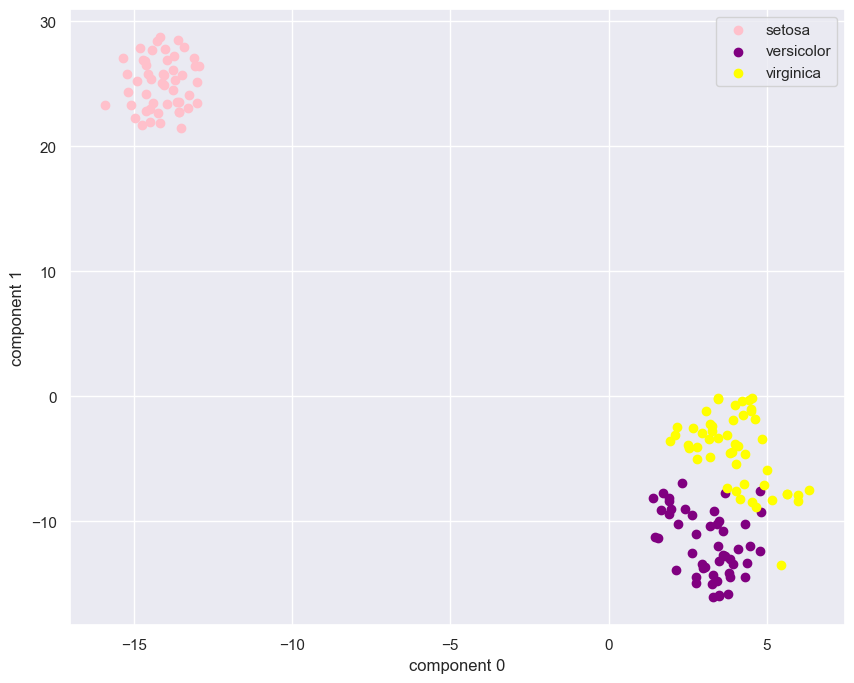

In [26]:
# class target 정보 불러오기 
tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

### 3차원 tsne 시각화

In [34]:
# 3차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 3).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])

tsne_df.head()

,component 0,component 1,component 2
0,30.083633,-81.529686,-13.332417
1,57.607407,-28.764011,108.914696
2,-9.962700,-64.189957,63.287804
3,-0.782481,-83.639488,104.976425
4,-108.466660,34.547596,-135.966858


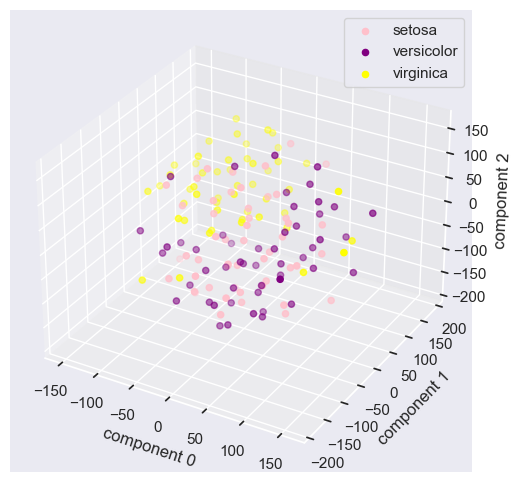

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = 'setosa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = 'versicolor')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = 'virginica')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()